In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve ,average_precision_score, f1_score, recall_score, accuracy_score

from sklearn.preprocessing import StandardScaler

#filter warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('../dataset/train.csv')
val_df = pd.read_csv('../dataset/val.csv')
test_df = pd.read_csv('../dataset/test.csv')

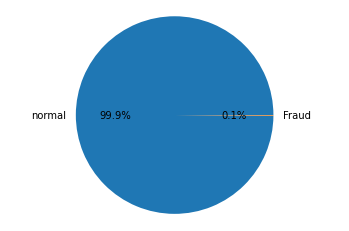

In [9]:
fig, ax = plt.subplots(1,1)
ax.pie(val_df.Class.value_counts(), autopct='%1.1f%%', labels=['normal','Fraud'])
plt.axis('equal')
plt.ylabel('')
plt.show()

In [39]:
# sns.countplot(val_df.Class)
# plt.show()

In [46]:
# val_df.Class.hist()

In [30]:
# for feature in ['V2', 'V4', 'V11'] :
#     ax = plt.subplot()
#     sns.distplot(val_df[feature][val_df.Class == 1], bins=50, label = 'fraud')
#     sns.distplot(val_df[feature][val_df.Class == 0], bins=50, label = 'normal')
#     # ax.set_xlabel('')
#     plt.legend(loc='best')
#     plt.show()

In [31]:
# import seaborn as sns
# import matplotlib.gridspec as gridspec
# # plt.figure(figsize=(5,5))
# for i, col in enumerate(val_df[val_df.iloc[:,1:-1].columns]) :
#     # print(col)
#     ax = plt.subplot()
#     sns.distplot(val_df[col][val_df.Class == 1], bins=50, label = 'fraud', color='r')
#     sns.distplot(val_df[col][val_df.Class == 0], bins=50, label = 'normal', color='b')
#     plt.legend(loc='best')
#     ax.set_title('feature: ' + str(col))
#     plt.show()

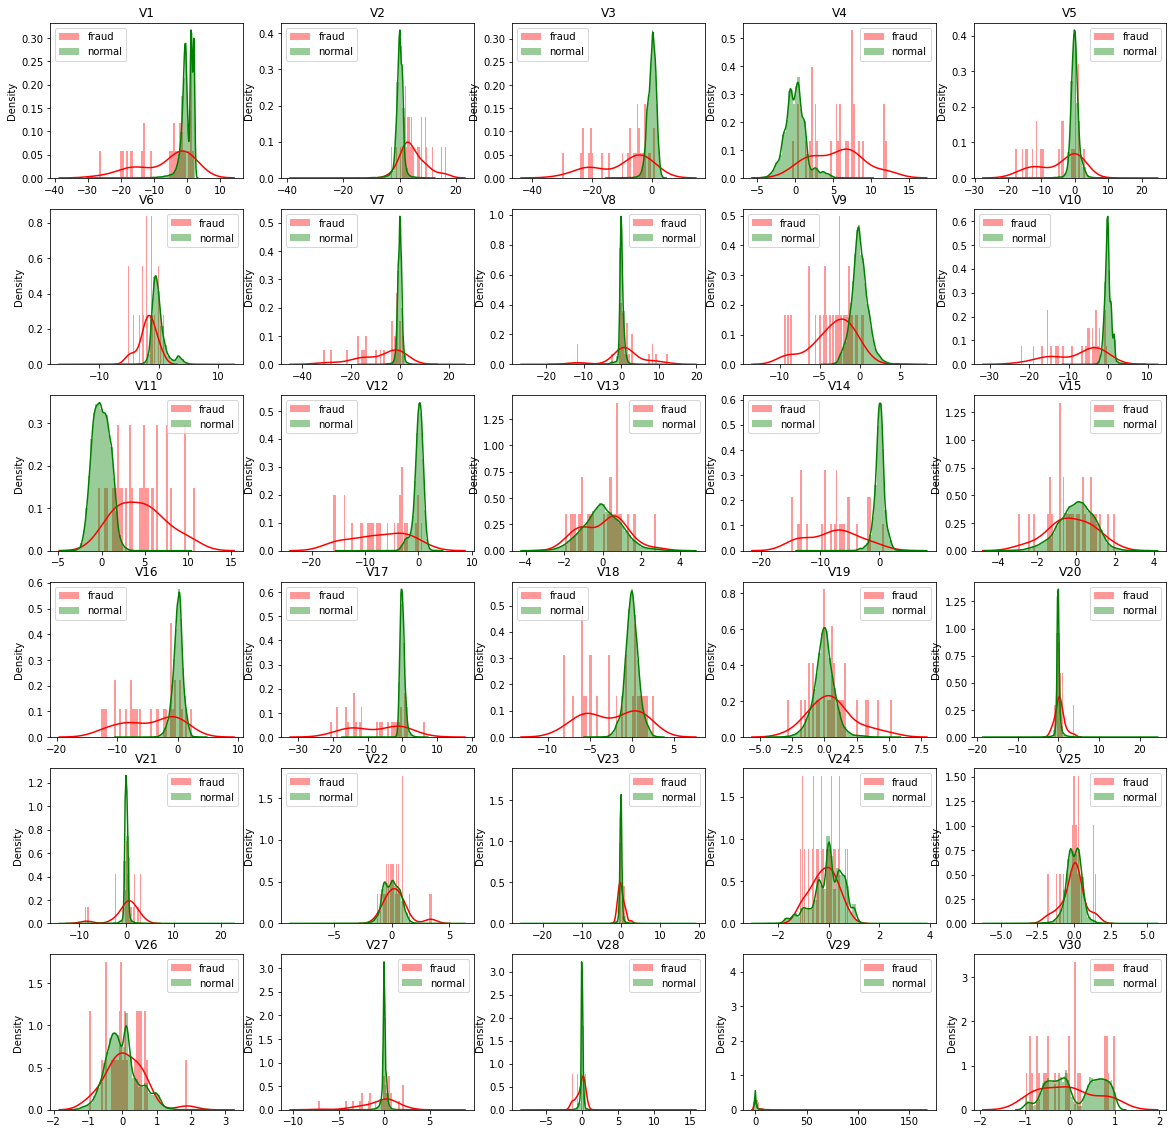

In [53]:
import seaborn as sns
import matplotlib.gridspec as gridspec
columns = val_df.drop(columns=['ID', 'Class']).columns
grid = gridspec.GridSpec(6,5)

plt.figure(figsize = (20, 10*2))

for n, col in enumerate(val_df[columns]) :
    ax = plt.subplot(grid[n])
    sns.distplot(val_df[val_df.Class == 1][col], bins=50, color='r', label='fraud')
    sns.distplot(val_df[val_df.Class == 0][col], bins=50, color='g', label='normal')
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
    plt.legend(loc='best')
    
plt.show()

In [55]:
def ztest(feature):
    
    mean = normal[feature].mean()
    std = fraud[feature].std()
    zScore = (fraud[feature].mean() - mean) / (std/np.sqrt(sample_size))
    
    return zScore

columns= val_df.drop(columns=['Class', 'ID']).columns
normal= val_df[val_df.Class==0]
fraud= val_df[val_df.Class==1]
sample_size=len(fraud)
significant_features=[]
critical_value=2.58

for i in columns:
    
    z_vavlue=ztest(i)
    
    if( abs(z_vavlue) >= critical_value):    
        print(i," is statistically significant") #Reject Null hypothesis. i.e. H0
        significant_features.append(i)

V1  is statistically significant
V2  is statistically significant
V3  is statistically significant
V4  is statistically significant
V5  is statistically significant
V6  is statistically significant
V7  is statistically significant
V9  is statistically significant
V10  is statistically significant
V11  is statistically significant
V12  is statistically significant
V14  is statistically significant
V16  is statistically significant
V17  is statistically significant
V18  is statistically significant


In [57]:
from sklearn.neighbors import LocalOutlierFactor
LOF = LocalOutlierFactor(novelty=True)
LOF.fit(train_df.drop('ID',axis=1))



LocalOutlierFactor(novelty=True)

In [66]:
pred = LOF.predict(val_df.drop(columns=['ID', 'Class']))
pred = np.where(pred == 1, 0, 1)
pred

array([1, 0, 0, ..., 0, 0, 0])

In [67]:
f1_score(val_df.Class.values, pred)

0.00715307582260372

In [68]:
val_df.Class.values

array([0, 0, 0, ..., 0, 0, 0])